<a href="https://colab.research.google.com/github/xbadiam/Energy_consumption_steel_industry/blob/main/notebooks/Energy_consumption_steel_industry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Energy consumption of the steel industry

## 1. Context

This company produces several types of coils, steel plates, and iron plates. The information on electricity consumption is held in a cloud-based system. The information on energy consumption of the industry is stored on the website of the Korea Electric Power Corporation (pccs.kepco.go.kr), and the perspectives on daily, monthly, and annual data are calculated and shown.

### 1.1. Attribute Information:

* Date Continuous-time data taken on the first of the month
* Usage_kWh Industry Energy Consumption Continuous kWh
* Lagging Current reactive power Continuous kVarh
* Leading Current reactive power Continuous kVarh
* CO2 Continuous ppm
* NSM Number of Seconds from midnight Continuous S
* Week status Categorical (Weekend (0) or a Weekday(1))
* Day of week Categorical Sunday, Monday : Saturday
* Load Type Categorical Light Load, Medium Load, Maximum Load

### 1.2. Acknowledgements

This dataset is sourced from the UCI Machine Learning Repository

### 1.3. Inspiration
Which times of the year is the most energy consumed?
What patterns can we identify in energy usage?

## 2. Imports

In [2]:
!rm -rf /content/Energy_consumption_steel_industry

! git clone https://github.com/xbadiam/Energy_consumption_steel_industry.git

Cloning into 'Energy_consumption_steel_industry'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 38 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (38/38), 598.79 KiB | 3.36 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [19]:
# Data processing
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# graphic
# ==============================================================================
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

## 3. Load data

In [4]:
data = pd.read_csv('/content/Energy_consumption_steel_industry/inputs/Steel_industry_data.csv')


In [5]:
data.head(10)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load
5,01/01/2018 01:30,3.28,3.56,0.0,0.0,67.76,100.0,5400,Weekday,Monday,Light_Load
6,01/01/2018 01:45,3.60,4.14,0.0,0.0,65.62,100.0,6300,Weekday,Monday,Light_Load
7,01/01/2018 02:00,3.60,4.28,0.0,0.0,64.37,100.0,7200,Weekday,Monday,Light_Load
8,01/01/2018 02:15,3.28,3.64,0.0,0.0,66.94,100.0,8100,Weekday,Monday,Light_Load
9,01/01/2018 02:30,3.78,4.72,0.0,0.0,62.51,100.0,9000,Weekday,Monday,Light_Load


In [6]:
# Dataset information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [7]:
# Statistical summary
print('Statistical Summary of Numerical Features:')
print('-' * 50)
data.describe().T

Statistical Summary of Numerical Features:
--------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
Usage_kWh,35040.0,27.386892,33.444380,0.0,3.20,4.57,51.2375,157.18
Lagging_Current_Reactive.Power_kVarh,35040.0,13.035384,16.306000,0.0,2.30,5.00,22.6400,96.91
Leading_Current_Reactive_Power_kVarh,35040.0,3.870949,7.424463,0.0,0.00,0.00,2.0900,27.76
CO2(tCO2),35040.0,0.011524,0.016151,0.0,0.00,0.00,0.0200,0.07
Lagging_Current_Power_Factor,35040.0,80.578056,18.921322,0.0,63.32,87.96,99.0225,100.00
Leading_Current_Power_Factor,35040.0,84.367870,30.456535,0.0,99.70,100.00,100.0000,100.00
NSM,35040.0,42750.000000,24940.534317,0.0,21375.00,42750.00,64125.0000,85500.00


In [8]:
# Preprocesado de datos (estableciendo índice y frecuencia)
# ==============================================================================

data['date'] = pd.to_datetime(data['date'], dayfirst=True, errors='coerce')
data = data.set_index('date')
data = data.sort_index()

In [9]:
start_date = data.index.min()
end_date = data.index.max()
date_range_complete = pd.date_range(start=start_date, end=end_date, freq=data.index.freq)

# Detectar si faltan fechas
missing_dates = date_range_complete.difference(data.index)

print(f"Complete index: {len(missing_dates) == 0}")
print(f"Missing dates: {len(missing_dates)}")
print(f"Rows with missing values: {data.isnull().any(axis=1).mean():.2%}")

Complete index: True
Missing dates: 0
Rows with missing values: 0.00%


In [10]:
# Extract temporal features from date
data['year'] = data.index.year
data['month'] = data.index.month
data['day'] = data.index.day
data['hour'] = data.index.hour
data['minute'] = data.index.minute
data['day_of_year'] = data.index.dayofyear
data['week_of_year'] = data.index.isocalendar().week
data['quarter'] = data.index.quarter

## 4. Data division

the dataset starts on 2018-01-01 00:00:00 and ends on 2018-12-31 23:45:00. In addition, to optimize the model's hyperparameters and evaluate its predictive performance, the data is divided into three sets: training, validation and test.

In [16]:
# 9. Dividir tren / test
split = int(len(data)*0.8)
data_train = data.iloc[:split]
data_test = data.iloc[split:]

In [17]:
print(f"Fechas train      : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
#print(f"Fechas validacion : {datos_val.index.min()} --- {datos_val.index.max()}  (n={len(datos_val)})")
print(f"Fechas test       : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

Fechas train      : 2018-01-01 00:00:00 --- 2018-10-19 23:45:00  (n=28032)
Fechas test       : 2018-10-20 00:00:00 --- 2018-12-31 23:45:00  (n=7008)


## 5. Graphic exploration

### 5.1. Time series chart

In [23]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_train.index, y=data_train['Usage_kWh'], mode='lines', name='Train'))
#fig.add_trace(go.Scatter(x=data_val.index, y=datos_val['Demand'], mode='lines', name='Validation'))
fig.add_trace(go.Scatter(x=data_test.index, y=data_test['Usage_kWh'], mode='lines', name='Test'))
fig.update_layout(
    title  = 'Actual Usage (kWh)',
    xaxis_title="Date",
    yaxis_title="Usage (MWh)",
    legend_title="Particion:",
    width=800,
    height=400,
    margin=dict(l=20, r=20, t=35, b=20),
    legend=dict(orientation="h", yanchor="top", y=1, xanchor="left", x=0.001)
)
fig.show()

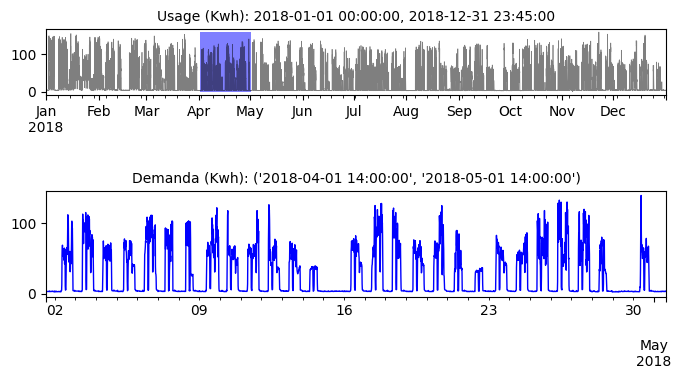

In [27]:
# Gráfico serie temporal con zoom
# ==============================================================================
zoom = ('2018-04-01 14:00:00','2018-05-01 14:00:00')
fig = plt.figure(figsize=(8, 4))
grid = plt.GridSpec(nrows=8, ncols=1, hspace=0.6, wspace=0)
main_ax = fig.add_subplot(grid[1:3, :])
zoom_ax = fig.add_subplot(grid[5:, :])
data['Usage_kWh'].plot(ax=main_ax, c='black', alpha=0.5, linewidth=0.5)
min_y = min(data['Usage_kWh'])
max_y = max(data['Usage_kWh'])
main_ax.fill_between(zoom, min_y, max_y, facecolor='blue', alpha=0.5, zorder=0)
main_ax.set_xlabel('')
data.loc[zoom[0]: zoom[1]]['Usage_kWh'].plot(ax=zoom_ax, color='blue', linewidth=1)
main_ax.set_title(f'Usage (Kwh): {data.index.min()}, {data.index.max()}', fontsize=10)
zoom_ax.set_title(f'Demanda (Kwh): {zoom}', fontsize=10)
zoom_ax.set_xlabel('')
plt.subplots_adjust(hspace=1)

When zooming in on the time series, a clear weekly seasonality becomes evident, with higher consumption during weekdays (Monday to Friday) and lower or nothing consumption on weeknends. It is also observed that there is a strong correlation between the consumption of one day and that of the previous day.  

### 5.2. Seasonality chart

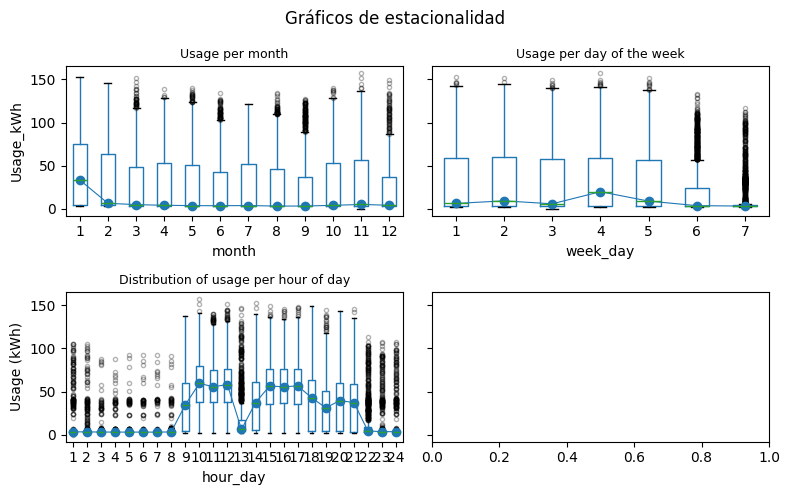

In [31]:
fig, axs = plt.subplots(2, 2, figsize=(8, 5), sharex=False, sharey=True)
axs = axs.ravel()

# Distribution of usage per month
data['month'] = data.index.month
data.boxplot(column='Usage_kWh', by='month', ax=axs[0], flierprops={'markersize': 3, 'alpha': 0.3})
data.groupby('month')['Usage_kWh'].median().plot(style='o-', linewidth=0.8, ax=axs[0])
axs[0].set_ylabel('Usage_kWh')
axs[0].set_title('Usage per month', fontsize=9)

# Distribution of usage per day of week
data['week_day'] = data.index.day_of_week + 1
data.boxplot(column='Usage_kWh', by='week_day', ax=axs[1], flierprops={'markersize': 3, 'alpha': 0.3})
data.groupby('week_day')['Usage_kWh'].median().plot(style='o-', linewidth=0.8, ax=axs[1])
axs[1].set_ylabel('Usage (kWh)')
axs[1].set_title('Usage per day of the week', fontsize=9)

# Distribution of usage per hour of day
data['hour_day'] = data.index.hour + 1
data.boxplot(column='Usage_kWh', by='hour_day', ax=axs[2], flierprops={'markersize': 3, 'alpha': 0.3})
data.groupby('hour_day')['Usage_kWh'].median().plot(style='o-', linewidth=0.8, ax=axs[2])
axs[2].set_ylabel('Usage (kWh)')
axs[2].set_title('Distribution of usage per hour of day', fontsize=9)

axs[3].title.set_size(10)

fig.suptitle("Gráficos de estacionalidad", fontsize=12)
fig.tight_layout()